This is a demonstration of the use of GFDL generated intake_esm catalogs on the ocean daily field zos. 
Reference: https://github.com/aradhakrishnanGFDL/canopy-cats

In [53]:
import xarray as xr
import intake,yaml,os
import intake_esm
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
print(intake_esm.__version__) 

2023.7.7


INSERT THE LOCATION OF YOUR DATA CATALOG IN THE CELL BELOW TO EXPLORE SOMETHING ELSE

In [7]:
col_url = "/home/a1r/git/canopy-cats/catalogs/gfdl_eg/om_example.json"

In [8]:
col = intake.open_esm_datastore(col_url)

/nbhome/a1r/miniconda3/envs/intake/lib/python3.9/site-packages/intake_esm/cat.py:269: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self._df.sample(20, replace=True)


Explore the catalog by viewing the "data frame" (df)

In [52]:
col.df

,activity_id,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,chunk_freq,grid_label.1,platform,dimensions,cell_methods,path
0,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,monthly,ocean_Iceland_Norway,NaN,NaN,NaN,volcello,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
1,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,monthly,ocean_Iceland_Norway,NaN,NaN,NaN,thetao,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
2,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,monthly,ocean_Iceland_Norway,NaN,NaN,NaN,so,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
3,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,monthly,ocean_Iceland_Norway,NaN,NaN,NaN,vmo,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
4,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,monthly,ocean_Iceland_Norway,NaN,NaN,NaN,vo,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos_max,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
9392,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos_min,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
9393,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
9394,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,mlotst,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...


#lets search for variables that I may need for my analysis

In [24]:
#Examples to just seom5_b02_minthick1em3_MLErestartarch for what we want from the catalog
expname_filter = ['om5_b02_minthick1em3_MLErestart']
modeling_realm = 'ocean_daily'
variable_id_filter = "zos"
frequency = "daily"

In [54]:
cat = col.search(experiment_id=expname_filter,frequency=frequency,modeling_realm=modeling_realm, variable_id = variable_id_filter)

In [55]:
cat

,unique
activity_id,1
institution_id,0
source_id,0
experiment_id,1
frequency,1
modeling_realm,1
table_id,0
member_id,0
grid_label,0
variable_id,1


If the files are in /archive, use the following dmgetmagic() to bring the files online before proceeding.

In [58]:
#for simple dmget usage, just use this !dmget {file}
#use following to wrap the dmget call for each path in the catalog
def dmgetmagic(x):
    cmd = 'dmget %s'% str(x) 
    return os.system(cmd)

#OR refer to importing dmget ,  https://github.com/aradhakrishnanGFDL/canopy-cats/tree/main/notebooks/dmget.py

In [59]:
cat.df["path"]

0     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
1     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
2     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
3     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
4     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
5     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
6     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
7     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
8     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
9     /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
10    /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
11    /archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
Name: path, dtype: object

In [40]:
dmstatus = cat.df["path"].apply(dmgetmagic)

In [41]:
cat.df

,activity_id,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,chunk_freq,grid_label.1,platform,dimensions,cell_methods,path
0,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
1,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
2,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
3,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
4,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
5,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
6,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
7,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
8,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...
9,dev,NaN,NaN,om5_b02_minthick1em3_MLErestart,daily,ocean_daily,NaN,NaN,NaN,zos,NaN,NaN,NaN,NaN,NaN,NaN,/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5...


In [29]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': False})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'experiment_id.frequency.modeling_realm.variable_id'


In [42]:
for k in dset_dict.keys(): 
    print(k)

om5_b02_minthick1em3_MLErestart.daily.ocean_daily.zos


In [43]:
ds = dset_dict["om5_b02_minthick1em3_MLErestart.daily.ocean_daily.zos"]

In [60]:
ds #the xarray dataset object

<xarray.Dataset>
Dimensions:     (time: 21915, nv: 2, xh: 1440, yh: 1080)
Coordinates:
    average_DT  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
  * nv          (nv) float64 1.0 2.0
  * time        (time) float64 0.5 1.5 2.5 3.5 ... 2.374e+04 2.374e+04 2.374e+04
    time_bnds   (time, nv) float64 dask.array<chunksize=(5, 2), meta=np.ndarray>
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Data variables:
    zos         (time, yh, xh) float32 dask.array<chunksize=(5, 1080, 1440), meta=np.ndarray>
Attributes:
    title:                            om5_b02_minthick1em3_MLErestart
    grid_type:                        regular
    grid_tile:                        N/A
    external_variables:               areacello
    intake_esm_vars:                  ['zos']
    intake_esm_attrs:activity_id:     dev
    intake_esm_attrs:experiment_id:   om5_b02_minthick1em3_MLErestart
    intake_esm_attrs:frequency:       daily
    intake_esm_attrs:modeling_realm:  ocean_daily
    intake_esm_attrs:variable_id:     zos
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           om5_b02_minthick1em3_MLErestart.daily.o...

In [44]:
len(ds.time)

21915

In [62]:
ds.zos #data array

<xarray.DataArray 'zos' (time: 21915, yh: 1080, xh: 1440)>
dask.array<concatenate, shape=(21915, 1080, 1440), dtype=float32, chunksize=(5, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
    average_DT  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
  * time        (time) float64 0.5 1.5 2.5 3.5 ... 2.374e+04 2.374e+04 2.374e+04
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    units:          m
    long_name:      Sea surface height above geoid
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_height_above_geoid

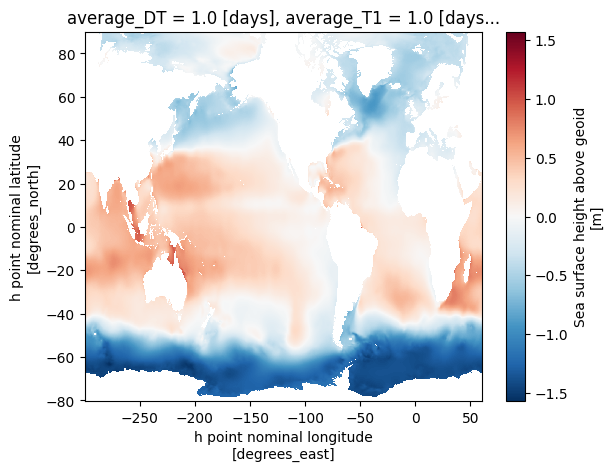

In [48]:
zos3d = ds.zos.isel(time=1).plot()